## Ads selection with reinforcement learning
we are finding strategy how we choose one ad to display to users each time when hey connect to a web page.

Three methods - Random selection, Upper Confidence Bound, and Thompson sampling - will be applied.

## Import all the module and function and load the data

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
import random

# Data is simulation data which expect that customers click some ads.
dataset = pd.read_csv('D:/Data/Ads.csv') 


## 1. Random Selection 

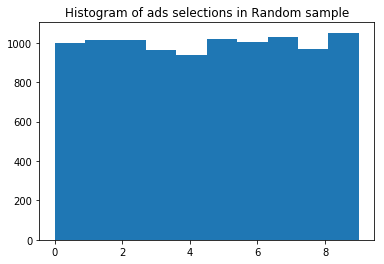

1231

In [14]:
N = 10000
d=10

# We choose a ad every step and if it matches up with the customer expectation, we will count 1 on the total_reward.
ads_selected_random = []
total_reward = 0

for n in range(0,N):
    ad = random.randrange(d)
    ads_selected_random.append(ad)
    reward = dataset.values[n,ad]
    total_reward += reward

# The histograms show how many ads are selected.
# visualize the results
plt.hist(ads_selected_random)
plt.title('Histogram of ads selections in Random sample')
plt.show()
total_reward

Of course we randomly choose ads and we get nearly uniformed distribution. It will be used for comparision.

## 2. Upper Confidence Bound Algorithm

step1 

At each round n, we consider two numbers for each ad i:

N_i(n) - the number of times the ad i was selected up to round n,

R_i(n) - the sum of rewards of the ad i up to round n

step2

From these two numbers we compute the average reward of ad i up to round n

r_i(n) = R_i(n)/N_i(n)

confidence interval [r_i(n)-delta_i(n),r_i(n)+delta_i(n)] Where delta_i(n)=sqrt(3log(n)/2N_i(n))

step3 

We select the ad i which has max UCB r_i(n)+delta_i(n)

## There is no package to implement UCB algorithm so we are going to build it from scratch.

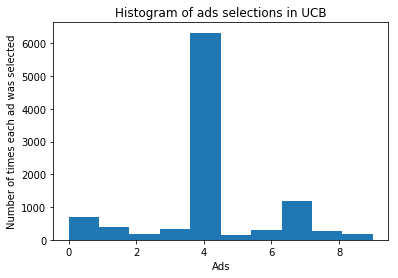

2178

In [15]:
numbers_of_selections = [0]*d
sums_of_rewards = [0]*d
ads_selected_UCB = []
total_reward = 0

for n in range(0,N):
    max_upper_bound = 0
    ad = 0
    for i in range(0,d):
        if (numbers_of_selections[i] >0):
            average_reward = sums_of_rewards[i] / numbers_of_selections[i]
            delta_i = math.sqrt(3/2 * math.log(n+1)/numbers_of_selections[i] )
            upper_bound = average_reward + delta_i
        else:
            upper_bound = 1e4000
        if upper_bound > max_upper_bound:
            max_upper_bound = upper_bound
            ad = i  
    ads_selected_UCB.append(ad)
    numbers_of_selections[ad]+=1
    reward = dataset.values[n,ad]
    sums_of_rewards[ad]+=reward
    total_reward = total_reward + reward
    
# visualize the results
plt.hist(ads_selected_UCB)
plt.title('Histogram of ads selections in UCB')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()
total_reward

Index 4 ads are selected mostly and total reward shows it performs better than random selection.

## 3. Implementing Thompson sampling

step1

N1_i(n) - the number of times the ad i got reward 1 up to round n
N0_i(n) - the number of times the ad i got reward 0 up to round n

step2

For each ad i, we take a random draw from the distribution below
o_i(n) = B(N1_i(n)+1, N0_i(n)+1)

step3

we select the ad that has the highest o_i(n)

generally Thompson sampling is better than UCB

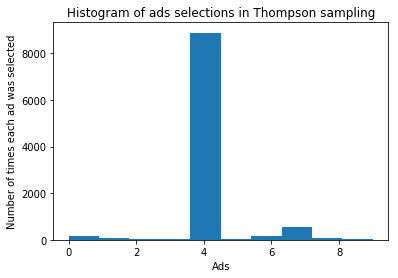

2558

In [17]:
numbers_of_rewards_1 = [0]*d
numbers_of_rewards_0 =  [0]*d
sums_of_rewards = [0]*d
ads_selected_Thompson = []
total_reward = 0

for n in range(0,N):
    max_random_draw = 0
    ad = 0
    for i in range(0,d):
        random_beta = random.betavariate(numbers_of_rewards_1[i]+1,numbers_of_rewards_0[i]+1)
        if random_beta > max_random_draw:
            max_random_draw = random_beta
            ad = i  
    ads_selected_Thompson.append(ad)
    reward = dataset.values[n,ad]
    if reward==1:
        numbers_of_rewards_1[ad] +=1
    else:
        numbers_of_rewards_0[ad] +=1
    total_reward = total_reward + reward

# visualize the results
plt.hist(ads_selected_Thompson)
plt.title('Histogram of ads selections in Thompson sampling')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()

total_reward

Index 4 ads are selected mostly as well but total reward shows it performs better than UCB.

As step goes further, the algorithms should select one ad which has the highest conversion rate.

We can check it by seeing ads_select_UCB and ads_select_Thompson.

By applying reinforcement learning, We can optimize advertising effects and ruduce advertismement costs within limited budgets.